## Задание:

1. Загрузить файл HR.csv в pandas dataframe.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных.Определить две самые скоррелированные и две наименеескоррелированные переменные.
4. Рассчитать сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    * Доля сотрудников с повышением за последние 5 лет
    * Средняя степень удовлетворенности
    * Среднее количество проектов


9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.



### Признаки:
* satisfaction_level - Уровень удовлетворенности работой
* last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах
* Work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left -уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет
* department - отдел в котором работает сотрудник
* salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import fabs
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Загрузка файла в датафрейм

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Общая информация о датафрейме

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Уникальне значения каждого столбца (проверка на посторонние значения)

[print(col, sorted(hr[col].unique())) for col in hr.columns]

satisfaction_level [0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
last_evaluation [0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
number_project [2, 3, 4, 5, 6, 7]
aver

[None, None, None, None, None, None, None, None, None, None]

### Вывод:

В датафрейме 10 столбцов, в каждом из них 14999 ненулевых значений, пропуски и посторонние значения отсутсвуют. Тип данных каждого столбца соответсвует типу данных признака. На данной этапе данные не требуют дополнительной обработки, подходят для дальнейшего анализа.

# 2. Расчет основых статистических показателей

In [5]:
# Выделение количественный переменных
quantitative_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
hr[quantitative_columns].describe(percentiles = [0.5])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [6]:
# Определение моды каждой переменной

hr.agg('mode').loc[0]

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

### Вывод:

- Сотрудники в среднем удовлетворены работой, среднее значение - 0,61.
- Размах значений времени, проводимого на работе значетеле (от 96 до 310 ч/мес), среднее время на рабочем месте достаточно велико - 210 ч/мес
- Минимальная продолжительность работы сотрудника в компании 2 года, т.е. "летунов" не набирают в штат.
- Каждый из сотрудников  течении последнего года проходил аттестацию.

# 3. Расчет и визуализация корреляционной матрицы для количественных переменных

In [7]:
# Выделение количественных показателей
quantitative_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Расчет корреляции количественных переменных между собой
corr_values = {}

for column in quantitative_columns:
    i = 0
    while i <= 4:
        if column != quantitative_columns[i]:
            key = column + ' - ' + quantitative_columns[i]
            value = hr[column].corr(hr[quantitative_columns[i]])
            corr_values[key] = value
        i += 1

In [8]:
# Определение наиболее и наимение скоррелированных переменных:

max_corr = max(corr_values, key = lambda k: fabs(corr_values[k]))
min_corr = min(corr_values, key = lambda k: fabs(corr_values[k]))

print(f'Наиболее скоррелированные показатели: {max_corr} со значением {round(corr_values[max_corr], 4)}') 
print(f'Наименее скоррелированные показатели: {min_corr} со значением {round(corr_values[min_corr], 4)}') 

Наиболее скоррелированные показатели: number_project - average_montly_hours со значением 0.4172
Наименее скоррелированные показатели: average_montly_hours - satisfaction_level со значением -0.02


In [9]:
# Корреляционная матрица количественных переменных

hr[quantitative_columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


### Вывод

Наиболее связаны между собой number_project и average_montly_hours, коэффициент корреляции 0,41. Степень взаимосвязи слабая, прямая, т.е. чем больше времени работник проводил на работе, тем больше проектов выполнил.

Наименее связаны показатели average_montly_hours и satisfaction_level. Коэффициен корреляции близок к нулю (-0.02), показатели практически не влияют друг на друга.

Большая часть пар показателей имеют величину коэффициента корреляции ниже 0,2, т.е. слабо скоррелированы.

# 4. Расчет количества сотрудников, работающих в каждом департаменте

In [10]:
# Распределение всех сотрудников по отдлеам (уволившихся и работающих)

hr.department.value_counts().sort_values(ascending = False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [11]:
# Распределение дейтсвующих сотрудников по отделам 

hr[hr['left'] == 0].department.value_counts().sort_values(ascending = False)

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [12]:
# Распределение уволившихся сотрудников по отделам 

hr[hr['left'] == 1].department.value_counts().sort_values(ascending = False)

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

### Вывод:

Самый многочисленный штат в отделе sales затем следуют technical и support.

Около двух третей работников продолжают работать в компании.

# 5. Распределение сотрудников по зарплатам

<AxesSubplot:title={'center':'Распределение всех сотрудников по зарплатам'}, xlabel='salary', ylabel='count'>

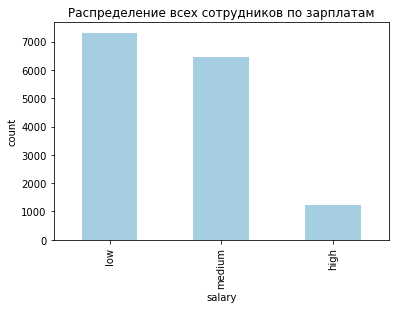

In [13]:
# Распределение сотрудников по зарплатам

hr.salary.value_counts().plot(kind = 'bar', title = 'Распределение всех сотрудников по зарплатам',
       xlabel ='salary', ylabel ='count', colormap = 'Paired')

<AxesSubplot:title={'center':'Распределение действующих сотрудников по зарплатам'}, xlabel='salary', ylabel='count'>

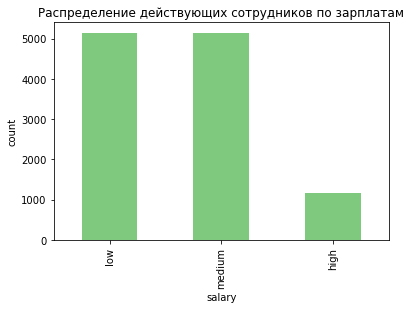

In [14]:
# Распределение работающих сотрудников по зарплатам  

hr[hr.left == 0].salary.value_counts().plot(kind = 'bar', title = 'Распределение действующих сотрудников по зарплатам',
                                            xlabel ='salary', ylabel ='count', colormap = 'Accent')

<AxesSubplot:title={'center':'Распределение уволившихся сотрудников по зарплатам'}, xlabel='salary', ylabel='count'>

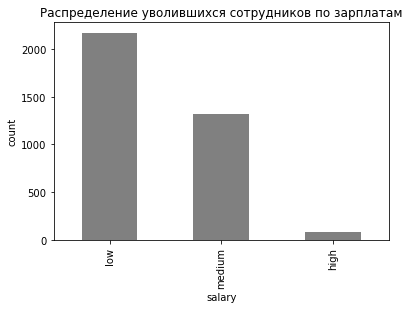

In [15]:
# Распределение уволившихся сотрудников по зарплатам  

hr[hr.left == 1].salary.value_counts().plot(kind = 'bar', title = 'Распределение уволившихся сотрудников по зарплатам',
                                            xlabel ='salary', ylabel ='count', color = 'grey')

### Вывод:

Большая часть действующих сотрудников получает низкую или среднюю заработную плату (их количество одинаково).

Большая часть уволившихся сотрудников получала низкую з/п.

Количество работников с высоким окладом не велико. При этом действующих сотрудников с высоким окладом больше, чем уволившихся.

# 6. Распределение сотрудников по зарплатам в каждом департаменте

<AxesSubplot:title={'center':'Распределение сотрудников по заплатам'}, xlabel='department', ylabel='count'>

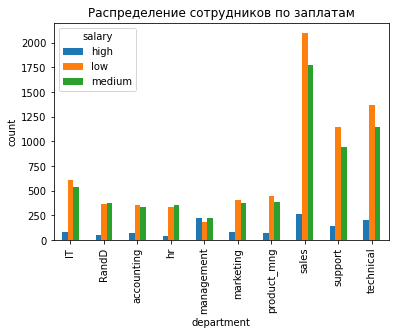

In [16]:
# Распределение всех соотрудников по зарплатам в каждом отделе

# Сводная таблица распределения
all_ = hr.pivot_table(index = 'department', columns = 'salary', values = 'left', aggfunc = 'count')
# Построение диаграммы
all_.plot(kind = 'bar', title = 'Распределение сотрудников по заплатам',
          xlabel ='department', ylabel ='count')

<AxesSubplot:title={'center':'Распределение действующих сотрудников по заплатам'}, xlabel='department', ylabel='count'>

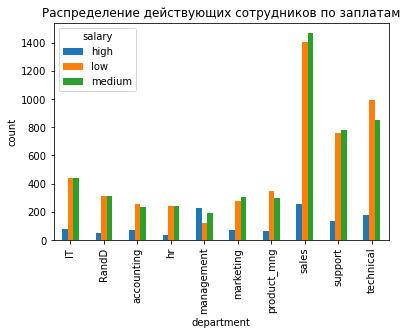

In [17]:
# Распределение действующих соотрудников по зарплатам в каждом отделе

# Сводная таблица распределения
not_left = hr[hr.left == 0].pivot_table(index = 'department', columns = 'salary', values = 'left', aggfunc = 'count')
# Построение диаграммы
not_left.plot(kind = 'bar', title = 'Распределение действующих сотрудников по заплатам',
              xlabel ='department', ylabel ='count')

<AxesSubplot:title={'center':'Распределение уволившихся сотрудников по заплатам'}, xlabel='department', ylabel='count'>

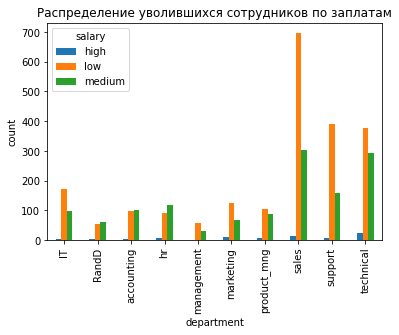

In [18]:
# Распределение уволившихся соотрудников по зарплатам в каждом отделе

# Сводная таблица распределения
left = hr[hr.left == 1].pivot_table(index = 'department', columns = 'salary', values = 'left', aggfunc = 'count')
# Построение диаграммы
left.plot(kind = 'bar', title = 'Распределение уволившихся сотрудников по заплатам',
              xlabel ='department', ylabel ='count')

### Вывод:

Наибольшее количество низко- и среднеоплачиваемых позиций в подразделениях: sales, support и technical (как среди уволившихся, так и среди действующих сотрудников).

Больше всего высокооплачиваемых сотрудников в подразделениях: management, sales и technical.

В подразделении management количество сотрудников с высоким оклпдом больше,чем с сотрудников с низким окладом.

# 7. Проверка гипотезы

In [19]:
# Группа работников с низкой зарплатой
low = hr[hr['salary'] == 'low']
# Группа работников с высокой зарплатой
high = hr[hr['salary'] == 'high']

Форумилование гипотез:

Н0: Сотрудники с з/п high проводят на работе больше времени, чем сотрудники с з/п low

Н1: Сотрудники с з/п high проводят на работе меньше времени, чем сотрудники с з/п low

In [20]:
# Пороговый уровень статистической значимости
alpha = 0.05

# Расчет одностореннего Т-теста
result = st.ttest_1samp(high['average_montly_hours'], low.average_montly_hours.mean(), alternative='less')
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую нулевую гипотезу')

Ttest_1sampResult(statistic=-0.83239123369722, pvalue=0.20267447348374662)
Не отвергаем нулевую нулевую гипотезу


### Вывод:

Рассчитанный p-value равен 0,2, что выше выбранного порогового уровня стат.значимости. На данном опыте не обнаружено значимых различий. Нулевая гипотеза о том, что сотрудники с высоким окладом проводят больше времени на работе, не отвергается.

# 8. Расчет показателей среди уволившихся и не уволившихся сотрудников

In [21]:
# Показатели по действующим сотрудникам:

# Деуствующие сотрудники компании
current_staff = hr[hr['left'] == 0]
# Доля сотрудников с повышением за последние 5 лет
promotion = len(current_staff[current_staff['promotion_last_5years'] == 1])/(len(current_staff))
# Средняя степень удоветворенности
satisfaction = current_staff['satisfaction_level'].sum()/len(current_staff)
# Среднее количество проектов
projects = current_staff['number_project'].mean()

print(f'Доля сотрудников с повышением за последние 5 лет: {round(promotion, 3)}')
print(f'Средняя степень удоветворенности: {round(satisfaction, 2)}')
print(f'Среднее количество проектов: {round(projects, 2)}')

Доля сотрудников с повышением за последние 5 лет: 0.026
Средняя степень удоветворенности: 0.67
Среднее количество проектов: 3.79


In [22]:
# Показатели по уволившимся сотрудникам:

# Уволившиеся сотрудники компании
left_staff = hr[hr['left'] == 1]
# Доля сотрудников с повышением за последние 5 лет
promotion = len(left_staff[left_staff['promotion_last_5years'] == 1])/(len(left_staff))
# Средняя степень удоветворенности
satisfaction = left_staff['satisfaction_level'].sum()/len(left_staff)
# Среднее количество проектов
projects = left_staff['number_project'].mean()

print(f'Доля сотрудников с повышением за последние 5 лет: {round(promotion, 4)}')
print(f'Средняя степень удоветворенности: {round(satisfaction, 2)}')
print(f'Среднее количество проектов: {round(projects, 2)}')

Доля сотрудников с повышением за последние 5 лет: 0.0053
Средняя степень удоветворенности: 0.44
Среднее количество проектов: 3.86


### Вывод:

- За апосление 5 лет действующие сотрудники чаще получали повышение,в сравнении с уволившимися.
- Средняя степень удовлетворенности действующих сотруднико выше, чем уволившихся. Уволившиеся сотрудники в среднем были не удовлетворены работой.
- Среднее количество выполненных проектов действующими и уволившимися сотрудниками приблизительно равно.

# 9. Построение модели LDA, предсказывающей уволился ли сотрудник.

In [23]:
# Входные данные

X = hr[['satisfaction_level', 'last_evaluation', 'number_project',        # Признаки для обучения модели
        'average_montly_hours', 'time_spend_company', 'Work_accident']]
y = np.array(hr.left)                                                     # Прогнозируемый признак

In [24]:
# Разделение данных на тестовую и обучающую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
# Создание класса

lda = LinearDiscriminantAnalysis()

In [26]:
# Обучение модели

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
# Прогноз на тестовой выборке

lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Оценка точности классификатора

accuracy_score(y_test, lda.predict(X_test))

0.7562222222222222

In [30]:
# Матрица неточностей

confusion_matrix(y_test, lda.predict(X_test))

array([[3138,  290],
       [ 807,  265]], dtype=int64)

Вывод:

Точность предсказания модели около 75%. Модель дает почти в три раза больше ложноотрицательных предсказаний (807), чем ложноположительных (290). В целом точность не высока. Целесообразно попробовать применить другой алгоритм обучения модели.